# Анализ товарного ассортимента

**Постановка задачи**

Заказчик исследования - интернет-магазин товаров для дома и быта «Пока все ещё тут». Необходимо провести анализ данных о транзакциях интернет-магазина.

**Цель исследования**

Провести анализ торгового ассортимента интернет-магазина и выделить основной и дополнительный ассортимент.

**Ход исследования**

Данные о транзакциях мы получим их файла `ecom_dataset_upd.csv`. О качестве данных заранее ничего не известно, поэтому перед исследовательским анализом мы ознакомимся с данными, и проведём предобработку данных.

На этапе предобработки мы обработаем возможные пропуски, дубликаты и аномалии. Мы также добавим новые столбцы с данными, которые пригодятся для дальнейшего исследования.

Таким образом наше исследование пройдёт в семь этапов.
- Обзор данных
- Предобработка данных
- Добавление столбцов в данные
- Проведение общего анализа данных
- Проведение ABC-анализа
- Проверка гипотез
- Написание вывода

**Описание данных**
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Открытие-и-изучение-данных" data-toc-modified-id="Открытие-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие и изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-явных-и-неявных-дубликатов" data-toc-modified-id="Обработка-явных-и-неявных-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка явных и неявных дубликатов</a></span></li><li><span><a href="#Обработка-выбросов-и-аномалий-в-данных" data-toc-modified-id="Обработка-выбросов-и-аномалий-в-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка выбросов и аномалий в данных</a></span></li><li><span><a href="#Добавление-столбцов-с-данными" data-toc-modified-id="Добавление-столбцов-с-данными-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Добавление столбцов с данными</a></span></li><li><span><a href="#Категоризация-товаров" data-toc-modified-id="Категоризация-товаров-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Категоризация товаров</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общий-анализ" data-toc-modified-id="Общий-анализ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общий анализ</a></span></li><li><span><a href="#ABC-анализ" data-toc-modified-id="ABC-анализ-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ABC-анализ</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка гипотез</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Презентация</a></span></li><li><span><a href="#Дашборд" data-toc-modified-id="Дашборд-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Дашборд</a></span></li></ul></div>

## Импорт библиотек

In [1]:
import locale
from string import punctuation

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

locale.setlocale(locale.LC_ALL, ('ru_RU', 'UTF-8'))
sns.set_style('darkgrid')

print('Библиотеки успешно импортированы')

Библиотеки успешно импортированы


## Открытие и изучение данных

In [2]:
google_id = '1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf'
df = pd.read_csv(f'https://drive.google.com/uc?export=download&id={google_id}')
original_lenght = len(df)
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


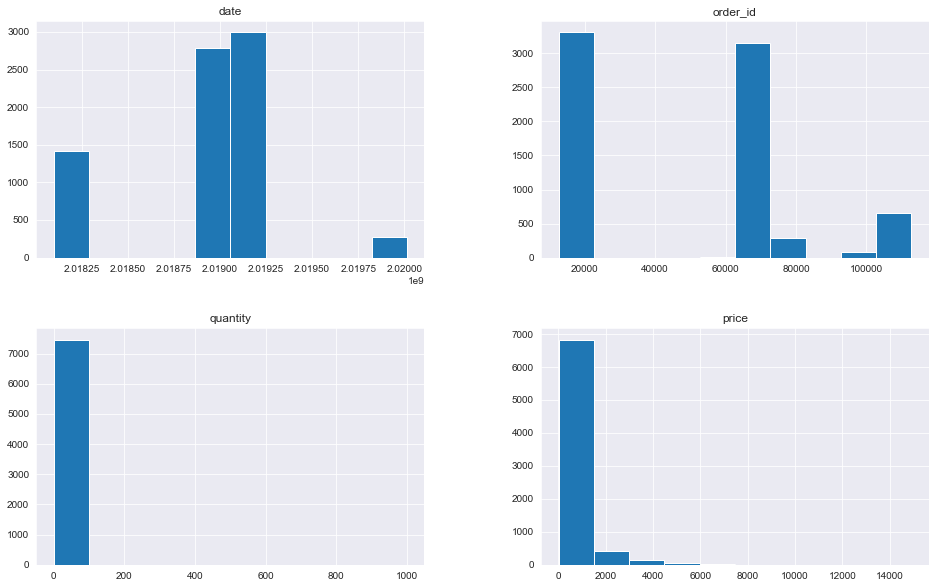

In [4]:
df.hist(figsize=(16, 10))
plt.show()

В нашем распоряжении датафрейм, состоящий из 6 столбцов и 7474 строк. На первый взгляд в нём нет пропусков, название столбцов приведены в стиле snake_case. По гистрограммам кажется, что есть аномалии и выбросы, что мы проверим на этапе предобработки данных. Проверим также наличие явных и неявных дубликатов. 

Типы данных для всех столбцов, кроме даты, указаны верно, приведём к нужному типу дату, и ещё, так как у нас указаны цены в рублях, для удобства отображения информации избавимся от копеек, приведя столбец с ценой к целочисленному типу данных.

In [5]:
# приведём cтолбцы к нужным типам
df['price'] = df['price'].astype('int64')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112


Проверим, за какой период у нас есть данные.

In [6]:
print(f'У нас есть данные за период с {df["date"].min().date()} по {df["date"].max().date()}.')

У нас есть данные за период с 2018-10-01 по 2020-01-31.


## Предобработка данных

### Обработка явных и неявных дубликатов

Проверим, есть ли в данных явные дубликаты.

In [7]:
print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


Явные дубликаты в данных отсутствует. Попробуем найти дубликаты без учёта даты, чтобы убедиться, что данные не задваивались.

In [8]:
subset = df.columns.to_list()
subset.remove('date')
df.duplicated(subset=subset).sum()

1864

Таких дубликатов довольно много, 1864. Так как у нас есть столбец с количеством товара, если бы в одном заказе было несколько одинаковых предметов, это было бы отображено в этом столбце. Убедимся, что это так, посмотрим значения этого столбца. 

In [9]:
df['quantity'].unique()

array([   1,   10,   96,   15,    6,   11,    2,    4,    3,    5,   37,
         64,   25,  150,   50,   30,   17,    8,    9,    7,  170,   16,
        140,   27,   20,   12,   13,   24,  100,  200,   57,   40,   45,
         29,   23,   43,   14,   31,   59,   60,   18,   26,  300,   70,
        334, 1000,   22,   80,   65], dtype=int64)

Таким образом, мы можем с уверенностью заявить, что это именно дубликаты, и их нам необходимо удалить. Причина таких дубликатов может заключаться в том, что данные перезаписывались и при этом возникла ошибка. При удалении дубликатов мы оставим в датафрейме первое появление задублировавшейся строки, так как вероятнее всего сначала произошёл заказ, а потом появились технические ошибки.

In [10]:
df.drop_duplicates(subset=subset, inplace=True)

Убедимся также, что на каждый заказ приходится ровно один клиент.

In [11]:
multiple_customers_by_order = df.groupby('order_id').agg({'customer_id': 'nunique'}).query('customer_id > 1')
print('Количество заказов, у которых более одного клиента:', len(multiple_customers_by_order))

Количество заказов, у которых более одного клиента: 29


У нас есть номера заказов, на которые приходятся более чем один id клиента. Так как мы не можем с уверенностью заявить, какие заказы верны, а какие ошибочно задублировались, от таких заказов нам стоит избавиться.

In [12]:
df.query('order_id not in @multiple_customers_by_order.index', inplace=True)

Мы обработали и удалили неявные дубликаты, которые составляли довольно значительную часть исходных данных.

In [13]:
print(f'После удаления дубликатов мы потеряли {1 - len(df) / original_lenght:.1%} от исходных данных.')

После удаления дубликатов мы потеряли 25.8% от исходных данных.


### Обработка выбросов и аномалий в данных

В наших данных два количественных столбца. Рассмотрим сначала столбец `quantity`.

In [14]:
df['quantity'].describe()

count    5544.000000
mean        2.581890
std        16.477423
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

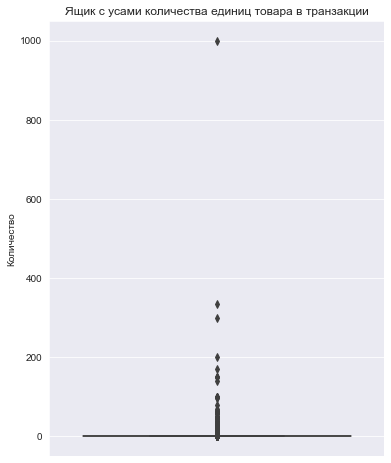

In [15]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='quantity')
plt.title('Ящик с усами количества единиц товара в транзакции')
plt.ylabel('Количество')
plt.show()

В абсолютном большинстве случаев товар продаётся в количестве 1 шт, и медианой, и квартилями количества товаров является единица. Рассмотрим транзакции с особо выбивающимся количеством товара, 100 шт. и более. 

In [16]:
df[df['quantity'] >= 100]

,date,customer_id,order_id,product,quantity,price
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"Щетка для посуды *ОЛЯ*, Мультипласт 1807010",100,26
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29
1555,2019-01-21 09:00:00,8eabcaca-e8c8-4eee-9079-4ff5f612273a,69893,Щетка для мытья посуды КОЛИБРИ М5202 большая,100,34
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148


Из рассмотренных транзакцией подозрительной кажется только продажа 1000 вантузов, такое ровное и крупное число может говорить о том, что такой заказ мог быть создан во время тестирования сервиса. Остальные заказы похожи на настоящие заказы от бизнесов.

Рассмотрим также столбец `price`.

In [17]:
df['price'].describe()

count     5544.000000
mean       530.363636
std        973.768136
min          9.000000
25%         90.000000
50%        150.000000
75%        524.000000
max      14917.000000
Name: price, dtype: float64

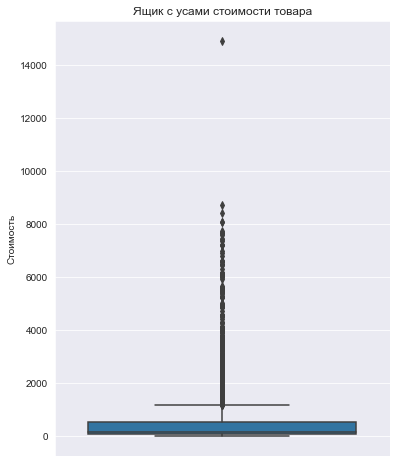

In [18]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='price')
plt.title('Ящик с усами стоимости товара')
plt.ylabel('Стоимость')
plt.show()

Построим также график в масштабе, чтобы лучше рассмотреть квартили.

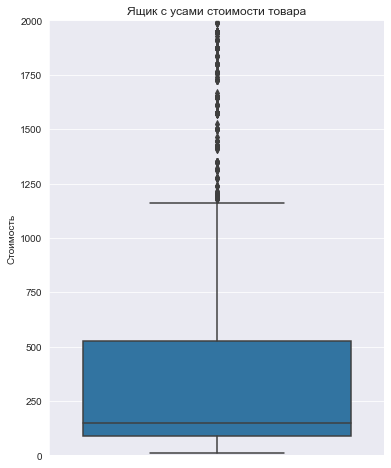

In [19]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='price')
plt.ylim(0, 2000)
plt.title('Ящик с усами стоимости товара')
plt.ylabel('Стоимость')
plt.show()

Рассмотрим товары с выбивающейся стоимостью.

In [20]:
df[df['price'] >= 7000]

,date,customer_id,order_id,product,quantity,price
654,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malv...,1,7597
1241,2018-12-17 17:00:00,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,Гладильная доска Leifheit AirBoard Compact M P...,1,7424
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,Сумка-тележка хозяйственная Andersen Alu Star ...,1,8437
2339,2019-03-14 18:00:00,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,Сумка-тележка хозяйственная Rolser IMX006 bass...,1,7679
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,Сумка-тележка хозяйственная Andersen Royal Sho...,1,8737
2976,2019-04-20 08:00:00,16838b36-762a-474d-bda4-bad95f8d7813,71209,Автоматическая щетка Leifheit для мытья окон с...,1,7229
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077
5087,2019-06-11 10:00:00,85716494-dd51-4d1d-ab28-8c74b87f14dc,71674,Сушилка для белья Leifheit Pegasus 200 DeLuxe ...,1,7004
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917
5994,2019-07-30 01:00:00,e2fe6b48-1955-4882-925c-733f545df026,72140,Сумка-тележка хозяйственная Rolser MNB017 fucs...,1,7679


In [21]:
df[df['price'] <= 10]

,date,customer_id,order_id,product,quantity,price
977,2018-11-25 14:00:00,52aff75c-a972-4c25-bad5-dfe6a48cd981,14512,Морковь Детская сладость 2 г 4660010775921,1,10
979,2018-11-25 14:00:00,52aff75c-a972-4c25-bad5-dfe6a48cd981,14512,"Огурец Засолочный 0,3 г 4660010776102",1,10
1069,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"Алиссум (лобулярия) Снежные одежды 0,2 г 46500...",2,9
1074,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"Кореопсис Толл 0,1 г 4650091480258",2,10
1078,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"Львиный зев Волшебный ковер 0,05 г 4660010779639",1,9
1086,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"Эшшольция Карминный король 0,5 г 4660010770193",2,10
2159,2019-03-04 15:00:00,0f47231c-3a68-404a-88f7-08a4a172c17f,14559,"Горох Амброзия 10,0 г 4660010772616",1,9
2161,2019-03-04 15:00:00,0f47231c-3a68-404a-88f7-08a4a172c17f,14559,"Незабудка смесь 0,1 г 4650091480340",1,10
2168,2019-03-04 15:00:00,0f47231c-3a68-404a-88f7-08a4a172c17f,14559,"Томат Балконное чудо 0,1 г 4660010772531",1,10
2169,2019-03-04 15:00:00,0f47231c-3a68-404a-88f7-08a4a172c17f,14559,"Укроп Обильнолистный 3,0 г 4660010772562",1,10


Цена товаров из рассмотренных транзакций кажется верной. По результатам проверки на аномалии мы уберём из данных только одну транзакцию с избыточным количеством товара.

In [22]:
df.query('quantity < 1000', inplace=True)

### Добавление столбцов с данными

В наших данных цена товара указана за одну единицу, поэтому добавим столбец с общей стоимостью транзакции.

In [23]:
df['total_cost'] = df['price'] * df['quantity']

Для удобства дальнейшего анализа создадим дополнительные столбцы с месяцем, днём недели и часом.

In [24]:
# столбец с годом транзакции 
df['year'] = df['date'].dt.year
# столбец с месяцем транзакции
month_categories = 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
df['month'] = pd.Categorical(df['date'].dt.month_name(locale='ru_RU.UTF-8'), categories=month_categories)
# столбец с днём недели транзакции
weekday_categories = 'Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'
df['weekday'] = pd.Categorical(df['date'].dt.day_name(locale='ru_RU.UTF-8'), categories=weekday_categories)

# столбец с часом транзакции
df['hour'] = df['date'].dt.hour
df.head()

,date,customer_id,order_id,product,quantity,price,total_cost,year,month,weekday,hour
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142,142,2018,Октябрь,Понедельник,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194,194,2018,Октябрь,Понедельник,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112,112,2018,Октябрь,Понедельник,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179,179,2018,Октябрь,Понедельник,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112,112,2018,Октябрь,Понедельник,0


### Категоризация товаров

Для дальнейшего анализа проведём категоризацию товаров из транзакций. Для начала посмотрим, сколько уникальных названий товаров у нас есть.

In [25]:
df['product'].nunique()

2333

Попробуем сократить это количество, сократив названия продуктов. Напишем функцию, которая оставит только первые два слова у названия. Нам потребуются как минимум два слова, так как первое слово может быть прилагательным.

In [26]:
def get_short_name(name: str) -> str:
    '''Функция для получения сокращённого названия продукта.
    
Фукция принимает на вход строку, переводит её в нижний регистр, заменяет букву "ё" на "е", 
убирает слова короче 3 символов и возвращает первые два слова новой строки.'''
    
    words = list(filter(lambda x: len(x) >= 3, name.lower().replace('ё', 'е').split()))
    return ' '.join(words[:2])

In [27]:
df['product_short'] = df['product'].apply(get_short_name)
df.head()

,date,customer_id,order_id,product,quantity,price,total_cost,year,month,weekday,hour,product_short
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142,142,2018,Октябрь,Понедельник,0,комнатное растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194,194,2018,Октябрь,Понедельник,0,комнатное растение
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112,112,2018,Октябрь,Понедельник,0,радермахера d-12
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179,179,2018,Октябрь,Понедельник,0,хризолидокарпус лутесценс
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112,112,2018,Октябрь,Понедельник,0,циперус зумула


In [28]:
df['product_short'].nunique()

919

Нам удалось значительно сократить количество уникальных названий товаров, по ним мы уже можем составить словарь категорий и товаров.

In [29]:
df['product_short'].unique()

array(['комнатное растение', 'радермахера d-12',
       'хризолидокарпус лутесценс', 'циперус зумула', 'шеффлера лузеана',
       'юкка нитчатая', 'настенная сушилка', 'таз пластмассовый',
       'чехол для', 'вешалка для', 'сушилка для', 'чехол eurogold',
       'крючок одежный', 'корзина мягкая', 'мини-сковорода marmiton',
       'сковорода алюминиевая', 'стеклянная крышка', 'доска гладильная',
       'сумка-тележка 2-х', 'многолетнее растение', 'рассада зелени',
       'муляж "райские', 'муляж банан,', 'муляж виноград', 'муляж гранат',
       'муляж груша', 'муляж груша,', 'муляж зеленое', 'муляж клубника',
       'муляж красное', 'муляж лимон,', 'муляж мандарин,', 'муляж перец,',
       'муляж персики', 'муляж томат,', 'муляж черешня',
       'щетка-сметка 3-х', 'щетка-сметка 4-х', 'сумка для',
       'тарелка обеденная', 'вилка столовая', 'ложка столовая',
       'ложка чайная', 'нож столовый', 'герань домашняя', 'ерш для',
       'пеларгония зональная', 'котел алюминиевый', 'сукк

На основе уникальных названий мы можем составить следующие категории товаров:
- `растения и семена`
- `кухонные принадлежности`
- `бытовая химия и средства гигиены`
- `мебель, декор и текстиль`
- `аксессуары и инструменты`

Напишем функцию, которая будет присваивать категории товарам и добавим в данные столбец с категориями.

In [30]:
def get_category(name: str) -> str:
    '''Функция для присваивания товару категории.
    
Принимает на вход строку с сокращённым названием товара, ищет вхождения одного из слов в словарь с категориями, если находит,
возвращает название категории их ключа словаря, иначе возвращает строку "другое"'''
    
    CATEGORIES = {
        'растения и семена': {
            'растение', 'шеффлера', 'литопс', 'лавр', 'хлорофитум', 'пахира',
            'фуксия', 'хризантема', 'цикламен', 'эхеверия', 'рукола', 'петрушка',
            'диффенбахия', 'амариллис', 'розмарин', 'роза', 'замиокулькас', 'клен',
            'импатиенс', 'фиалка', 'спатифиллум', 'мединилла', 'зверобой',
            'лантана', 'хамедорея', 'тыква', 'огурец', 'кабачок', 'вигна', 'шалфей',
            'табак', 'сельдерей', 'монарда', 'любисток', 'капуста', 'змееголовник',
            'валериана', 'анемона', 'буддлея', 'лаватера', 'фатсия', 'лен', 'колокольчик',
            'камнеломка', 'бадан', 'патиссон', 'физостегия', 'солидаго', 'бузульник', 'астра',
            'алиссум', 'аквилегия', 'травы', 'пеларгония', 'сциндапсус', 'молодило', 'осина',
            'вербена', 'барвинок', 'бакопа', 'седум', 'лапчатка', 'рудбекия', 'нивянник', 'монарда',
            'гайлардия', 'томат', 'рассада', 'хоста', 'фатсия', 'арбуз', 'драцена', 'джункус',
            'петуния', 'лук', 'кориандр', 'маттиола', 'клубника', 'дыня', 'баклажан', 'целозия'
            'вероника', 'кореопсис', 'муррайя', 'тагетис', 'флокс', 'пиретрум', 'мускари',
            'эвкалипт', 'лобелия', 'тимьян', 'виноград', 'настурция', 'базилик', 'цинния',
            'бальзамин', 'земляника', 'календула', 'томата', 'гардения', 'синнингия', 'гортензия',
            'пеперомия', 'цитрофортунелла', 'гвоздика', 'энотера', 'платикодон', 'папоротник',
            'лилейник', 'виола', 'лаванда', 'бегония', 'калибрахоа', 'мята', 'ясколка',
            'эхинацея', 'котовник', 'вербейник', 'смолевка', 'космея', 'георгина', 'овсянница',
            'ранункулус', 'чабер', 'гиацинт', 'дендробиум', 'тюльпан', 'декабрист', 'калла',
            'укроп', 'нефролепис', 'незабудка', 'горох', 'пуансеттия', 'мирт', 'фаленопсис',
            'эпипремнум', 'примула', 'подарочный', 'гипсофила', 'крокусы', 'фал', 'кофе', 
            'антуриум', 'эхинокактус', 'калатея', 'гимнокалициум', 'гербера', 'кодонанта', 
            'фикус', 'аптения', 'алоэ', 'фиттония', 'аспарагус', 'скиммия', 'крассула', 'дерево',
            'ель', 'кипарисовик', 'гиностемма', 'пуансетия', 'подсолнечник', 'эшшольция', 'цинерария',
            'львиный', 'годеция', 'морковь', 'бархатцы', 'соланум', 'мимоза', 'капсикум', 'каллуна',
            'калоцефалус', 'каланхое', 'артемизия', 'альбука', 'мелисса', 'душица', 'афеляндра',
            'сантолина', 'иссоп', 'цветущее', 'азалия', 'глоксиния', 'нолина', 'кампанула', 
            'адиантум', 'суккулент', 'герань', 'юкка', 'циперус', 'хризолидокарпус', 'радермахера',
            'вероника', 'целозия',
        },
        'кухонные принадлежности': {
            'миксер', 'стакан', 'салатник', 'кипятильник', 'половник', 'кружка',
            'вакуумный', 'нож', 'терка', 'соковыжималка', 'пьезозажигалка', 'соковарка',
            'чайник', 'сахарница', 'миска', 'хлебница', 'крышка', 'шприц', 'отделитель',
            'кастрюля', 'лоток', 'сотейник', 'посуды', 'банка', 'ложка', 'термокружка',
            'блюдо', 'тортница', 'форма', 'сковорода', 'сито', 'венчик', 'скалка', 'кухонное',
            'салфетка', 'салфетки', 'орехоколка', 'толкушка', 'просеиватель', 'модульная', 
            'емкость', 'контейнер', 'мантоварка-пароварка', 'разделочная', 'бульонница', 'блюдце',
            'электроштопор', 'термос', 'кувшин', 'защитный', 'пресс', 'форма', 'рассекатель',
            'картофелемялка', 'силиконовая', 'рыбочистка', 'набор', 'ножницы', 'ковш', 'мантоварка', 
            'губка', 'измельчитель', 'овощечистка', 'салфетница', 'лопатка', 'овощеварка', 'тарелка',
            'масленка', 'ножеточка', 'tepмокружка', 'вкладыши', 'противень', 'котел', 'вилка', 'мини-сковорода',
            'термостакан', 
        },
        'бытовая химия и средства гигиены': {
            'паста', 'отбеливатель', 'антинакипин', 'концентрат', 'мыло-скраб', 'маска',
            'гипоаллергенный', 'соль', 'кондиционер', 'мыло', 'ополаскиватель', 'бальзам',
            'средство', 'антижир', 'бензин', 'крем', 'биопорошок',
        },
        'мебель, декор и текстиль': {
            'подушка', 'простыня', 'муляж', 'постельное', 'скатерть', 'покрывало',
            'ткань', 'вешалка', 'покрытие', 'корзина', 'коробка', 'ваза', 'этажерка',
            'искусственный', 'стеллаж', 'полотенце', 'вешалка-стойка', 'пододеяльник',
            'квадро', 'наволочка', 'тряпкодержатель', 'одеяло', 'наматрацник', 'кашпо',
            'урна-пепельница', 'ткань', 'полка', 'рукав', 'композиция', 'халат', 'штанга',
            'сиденье', 'искусственная', 'крючок', 'карниз', 'вешалка-перекладина', 'складная',
            'ключница', 'полки', 'простынь', 'фоторамка', 'кольца', 'махровых', 'коврик',
            'мыльница', 'вешалка-сушилка', 'подставка', 'постельного', 'комод', 'почтовый',
            'кофр', 'вешалки', 'держатель', 'урна', 'подрукавник', 'вешалка-плечики', 'наматрицник-чехол',
            'наматрасник', 'короб', 'ящик', 'штора', 'светильник', 'плечики', 'ковер', 'плед',
            'подкладка', 'чехол',
        },
        'аксессуары и инструменты': {
            'ведро', 'ерш', 'сумка-тележка', 'швабра', 'совок',
            'тряпка', 'перчатки', 'щетка', 'инструментов', 'инструмент', 'мешок', 
            'основание', 'угольник', 'сушилка', 'прищепки', 'стремянка', 
            'коробка', 'корзинка', 'ванна', 'детский', 'бидон', 'таз', 'отжим', 'скребок',
            'валик', 'окномойка', 'весы', 'насадка-моп', 'насадка', 'веник', 'бак', 'лестница-стремянка',
            'утюг', 'vileda', 'пылесос', 'насадка-отжим', 'сумка', 'вантуз', 'стремянка-табурет',
            'подголовник', 'щетка-сметка', 'шило', 'термометр', 'блок', 'ролик', 'фен', 'пробка',
            'линейка', 'сметка', 'корыто', 'гладильная', 'тележка', 'щетка-утюжок', 'стремянки',
            'комплект', 'дозатор', 'сетка', 'шпингалет', 'стяжки', 'уголок', 'решетка', 'ручка', 'завертка',
            'веревка', 'шнур', 'шпагат', 'сверло', 'фиксатор-шар', 'штангенциркуль',
            'петля', 'ручка-скоба', 'петля-стрела', 'измерительный', 'сварка', 'сверло-фреза',
            'сверел', 'пена', 'пружина', 'крепеж', 'стяжка',
        }
    }
    
    for word in name.split():
        for category, word_set in CATEGORIES.items():
            if word.strip(punctuation) in word_set:
                return category
    return 'другое'

In [31]:
df['category'] = df['product_short'].apply(get_category)
df['category'].unique()

array(['растения и семена', 'аксессуары и инструменты',
       'мебель, декор и текстиль', 'кухонные принадлежности',
       'бытовая химия и средства гигиены'], dtype=object)

Нам удалось присвоить категорию каждому товару из транзакций.

Мы завершили предобработку данных о транзацкиях. Во время предобработки мы избавились от дубликатов, потеряв 26% от исходных данных, рассмотрели аномальные значения, добавили столбцы с данными, а также разделили все товары на категории, теперь можно приступать к анализу данных.

## Исследовательский анализ данных

### Общий анализ

Посмотрим, как распределились товары по нашим категориям. Для этого посчитаем количество уникальных товаров в каждой категории и простроим график.

In [32]:
products_by_cat = (
    df
    .groupby('category', as_index=False)
    .agg({'product': 'nunique'})
    .rename(columns={'product': 'unique_products'})
    .sort_values('unique_products', ascending=False)
    .reset_index(drop=True)
)
products_by_cat

,category,unique_products
0,растения и семена,913
1,"мебель, декор и текстиль",547
2,аксессуары и инструменты,524
3,кухонные принадлежности,318
4,бытовая химия и средства гигиены,31


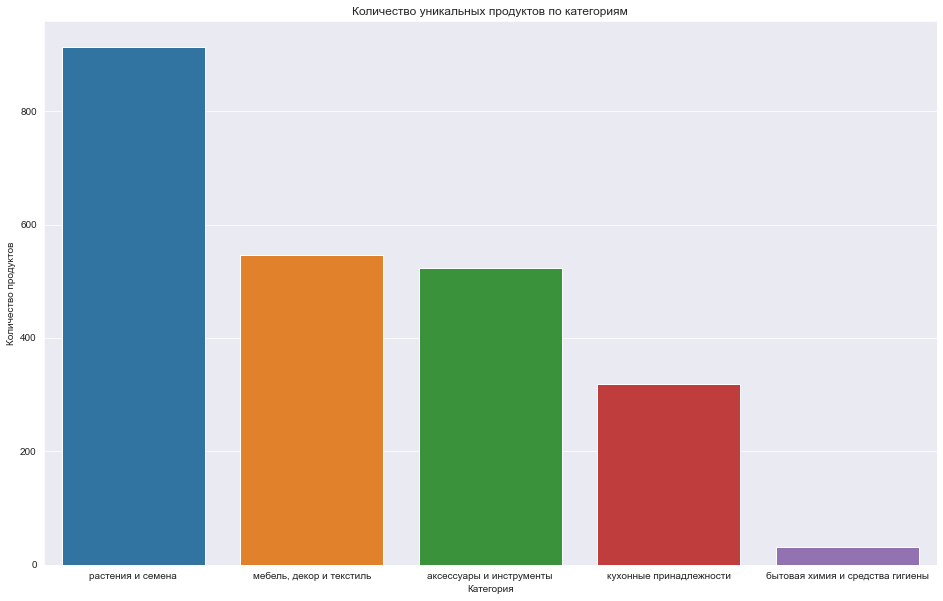

In [33]:
plt.figure(figsize=(16, 10))
sns.barplot(data=products_by_cat, x='category', y='unique_products')
plt.title('Количество уникальных продуктов по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество продуктов')
plt.show()

Самой крупной по количеству уникальных товаров получилась категория `растения и семена`, около 900 товаров. Меньше всего товаров в категории `бытовая химия и средства гигиены`, 31 товар. В остальных категориях количество уникальных товаров составляет от 300 до 600 шт.

Рассмотрим медианну и квартили стоимости товара у каждой категории и построим ящики с усами.

In [34]:
df.groupby('category')['price'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
аксессуары и инструменты,1212.0,1390.828383,1533.092354,19.0,449.0,787.0,1724.00,14917.0
"мебель, декор и текстиль",1041.0,597.066282,849.961385,15.0,59.0,262.0,899.00,7349.0
кухонные принадлежности,483.0,430.755694,671.408050,19.0,97.0,194.0,479.00,5512.0
растения и семена,2761.0,150.439696,216.058948,9.0,89.0,127.0,150.00,3599.0
бытовая химия и средства гигиены,46.0,195.913043,198.380535,15.0,79.0,100.5,222.25,899.0


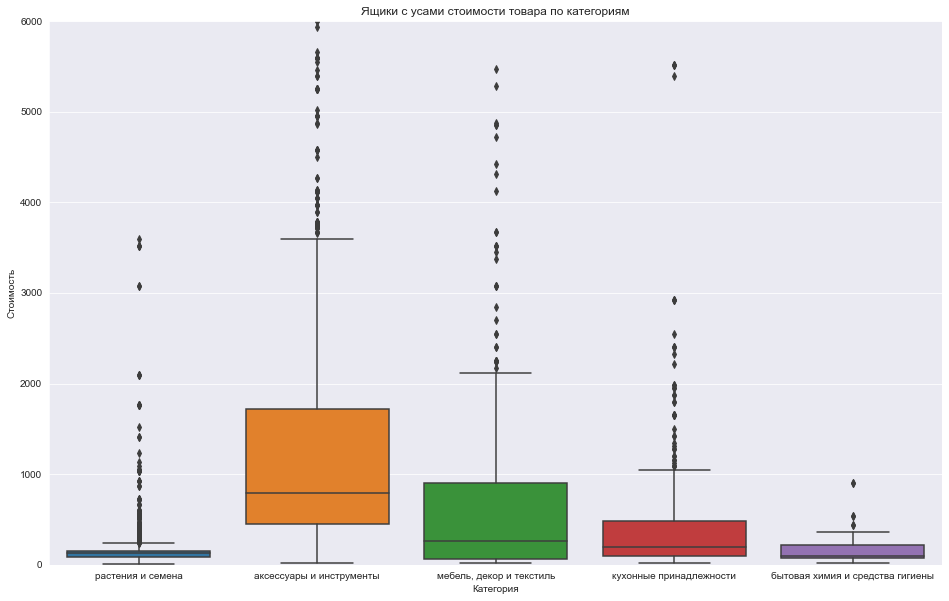

In [35]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, y='price', x='category')
plt.ylim(0, 6000)
plt.title('Ящики с усами стоимости товара по категориям')
plt.ylabel('Стоимость')
plt.xlabel('Категория')
plt.show()

Самая высокая медианная стоимость товаров принадлежит категории `аксессуары и инструменты` и составялет *787 руб*. Этой же категории принадлежит самый дорогой товар, который стоит *14917 руб*. После неё идут категории `мебель, декор и текстиль` и `кухонные принадлежности` с медианами стоимости *262 и 194 руб*. Ниже всего медианы стоимости у категорий `растения и семена` и `бытовая химия и средства гигиены`, они составляют *127 и 100 руб*.

Сравним количество проданных товаров каждой категории и выручку, которую они принесли, для этого простроим два пайчарта.

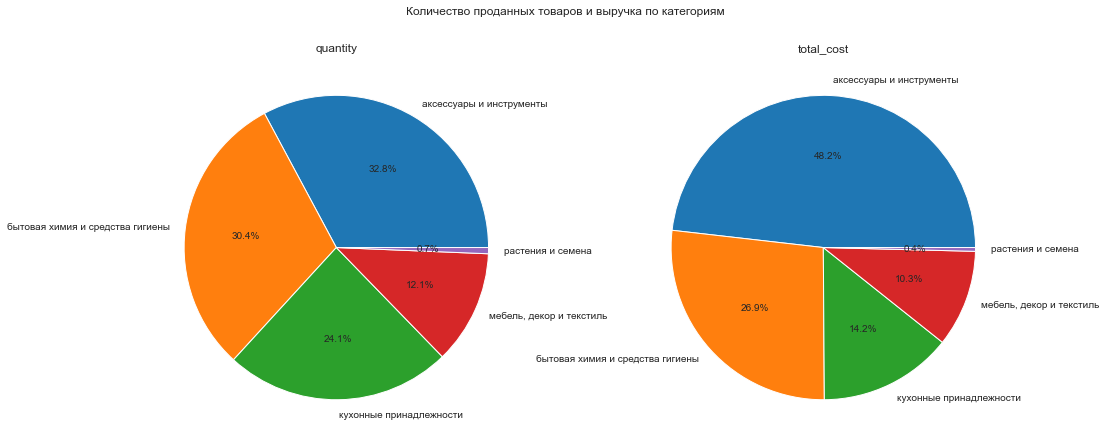

In [36]:
plt.figure(figsize=(16, 7)).suptitle('Количество проданных товаров и выручка по категориям')

data = (
    df
    .groupby('category')
    .agg({'quantity': 'sum', 'total_cost': 'sum'})
)
i = 1

for column in ('quantity', 'total_cost'):
    plt.subplot(1, 2, i)
    plt.pie(
        data=data.sort_values(by=column, ascending=False),
        x=column,
        labels=data.index,
        autopct='%.1f%%'
    )
    plt.title(column)
    i += 1
plt.show()

Почти одинаковое количество товаров было продано в категориях `аксессуары и инструменты` и `бытовая химия и средства гигиены`, около 30% для каждой из этих категорий. При этому по выручке `аксессуары и инструменты` составляют почти половину от общей выручки. `бытовая химия и средства гигиены` принесли 27% от общей выручки. Меньше всего продаж и меньше всего выручки принесла категория `растения и семена`, менее 1% от продаж и менее 0,5% от общей выручки.

Мы можем сделать наблюдение, что в категории `бытовая химия и средства гигиены` с большим отрывом меньше всего уникальных товаров, но при этом это одна из самых популярных категорий, и по количеству продаж и по выручке она на втором месте. Возможно, стоит рассмотреть расширение ассортимента товаров этой категории. 

Обратное можно сказать про категорию `растения и семена`, при своём огромном ассортименте она приносит очень мало продаж и выручки. Возможно, имеет смысл уменьшить ассортимент этой категории, оставив только наиболее популярные позиции.

Рассмотрим, как происходит распределение уникальных заказов по часам дня и по дням недели.

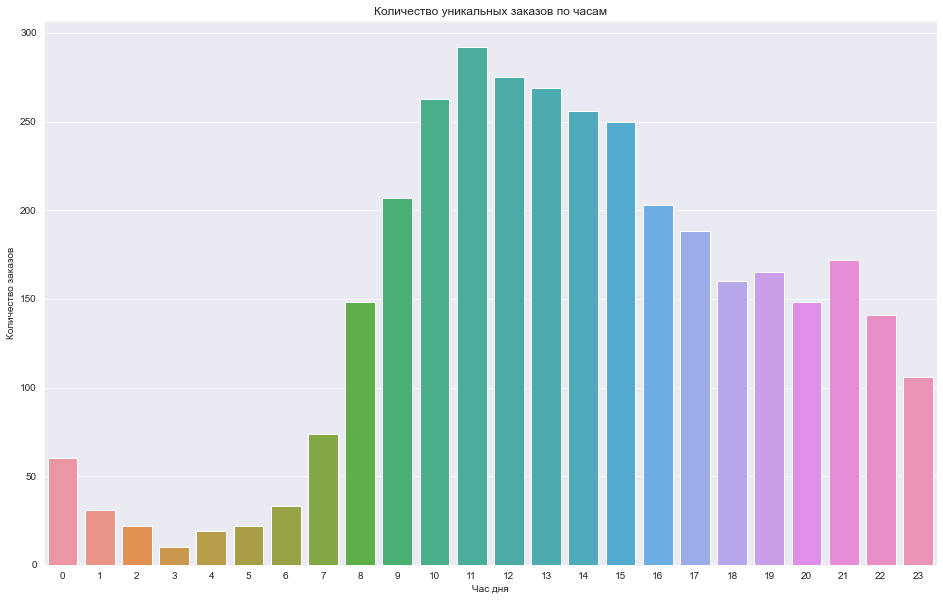

In [37]:
orders_by_hours = (
    df
    .groupby('hour', as_index=False)
    .agg({'order_id': 'nunique'})
)

plt.figure(figsize=(16, 10))
sns.barplot(data=orders_by_hours, x='hour', y='order_id')
plt.title('Количество уникальных заказов по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество заказов')

plt.show()

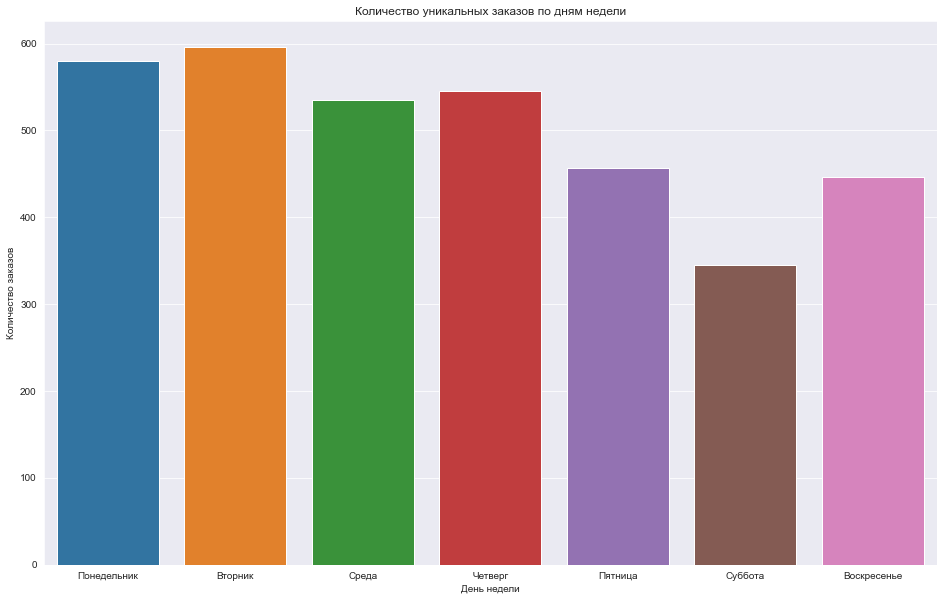

In [38]:
orders_by_weekdays = (
    df
    .groupby('weekday', as_index=False)
    .agg({'order_id': 'nunique'})
    .sort_values('weekday')
)

plt.figure(figsize=(16, 10))
sns.barplot(data=orders_by_weekdays, x='weekday', y='order_id')
plt.title('Количество уникальных заказов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество заказов')

plt.show()

Мы можем сделать следующие наблюдения:
- В течение дня продажи начинают расти с **7:00**
- Самый большой пик продаж приходится на период с **10:00** до **15:00**, после чего происходит спад
- Второй рост продаж в течение дня приходится на **21:00**, вероятнее всего в это время люди совершают заказ из дома после работы

- Больше всего заказов приходится на **понедельник** и **вторник**, при этом лидером является **вторник**
- Чуть меньше заказов приходится на **среду** и **четверг**
- Количество заказов падает в **пятницу** и падает ещё сильнее в **субботу**, где достигает своего минимума. С **воскресенья** снова начинается рост количества заказов

Рассмотрим сезонность заказов, для этого построим график среднего количества уникальных заказов по месяцам, и такой же график, но с разделением по категориям.

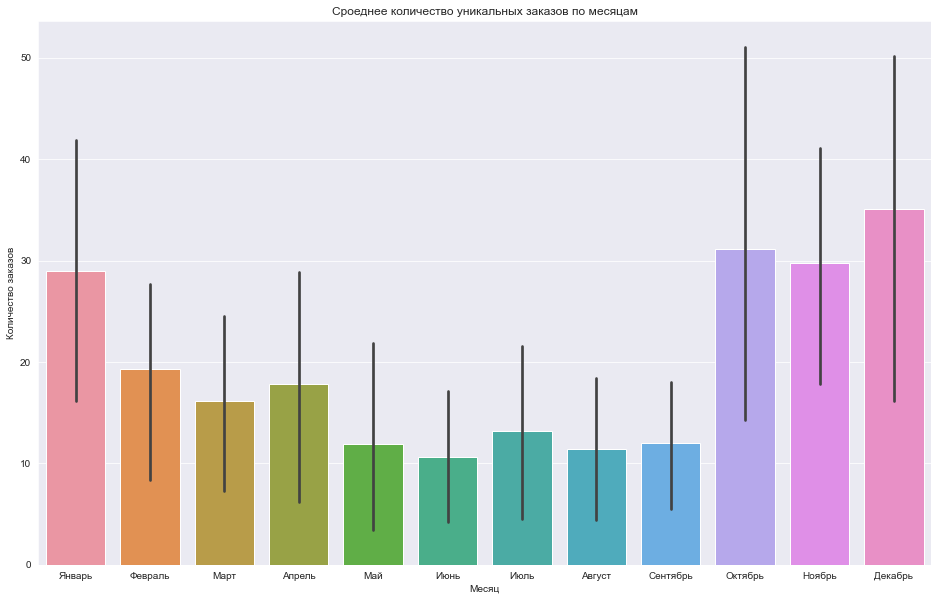

In [39]:
mean_orders_by_months = (
    df
    .groupby(['month', 'year', 'category'])
    .agg({'order_id': 'nunique'})
    .reset_index()
    .groupby(['month', 'category'], as_index=False)
    .agg({'order_id': 'mean'})
)

plt.figure(figsize=(16, 10))
sns.barplot(data=mean_orders_by_months, x='month', y='order_id')
plt.title('Сроеднее количество уникальных заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')

plt.show()

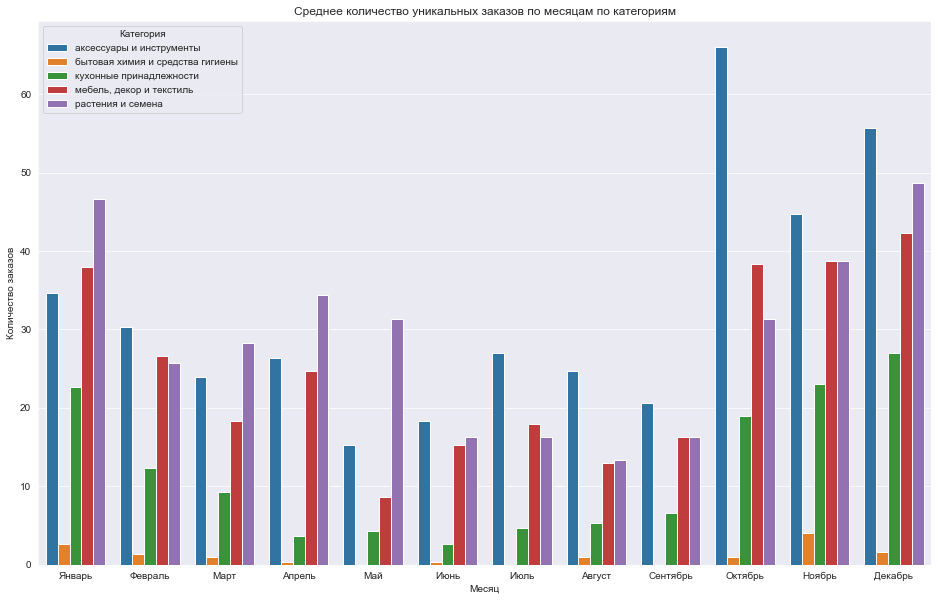

In [40]:
plt.figure(figsize=(16, 10))
sns.barplot(data=mean_orders_by_months, x='month', y='order_id', hue='category')
plt.title('Среднее количество уникальных заказов по месяцам по категориям')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.legend(title='Категория')
plt.show()

Мы можем сделать следующие наблюдения:
- В целом продукция магазина чаще всего покупается в период с **октября** по **январь**, при этом лидером является **декабрь**
- Реже всего продукция покупается с **мая** по **сентябрь**, с небольшим повышением в **июле**. Меньше всего заказов происходит в **июне**
- У категории `аксессуары и инструменты` пик продаж приходится на **октябрь**, после него идут **декабрь** и **ноябрь**. Меньше всего продаж этой категории приходится на **май**
- У категории `растения и семена` пик продаж приходится на **декабрь** и **январь**. Дополнительное повышение продаж мы можем наблюдать в **апреле** и **мае**. Меньше всего продаж приходится на **август**
- У категории `кухонные принадлежности` пик продаж приходится на период с **октября** по **январь**, лидером является **декабрь**, вероятно, товары этой категории чаще всего покупают в подарок на новый год. Меньше всего товаров этой категории покупают в период с **апреля** по **сентябрь**.
- Схожая ситуация у категории `мебель, декор и текстиль`, пик приходится на период с **октября** по **январь**, лидером является **декабрь**, тоже можем сделать вывод, что предметы этой категории покупаются в подарок. Меньше всего продаж в **мае**
- У категории `бытовая химия и средства гигиены` больше всего продаж в **ноябре**, и меньше всего в **мае**

### ABC-анализ

Для того, чтобы выделить **основной** и **дополнительный** ассортимент, проведём два ABC-теста, один по выручке, другой по количеству проданного товара. Договоримся, что будем применять следующие категории ассортимента
- `A` - приоритетные товары, до 80% от общей выручки / количества продаж
- `B` - обычные товары, 15% от общей выручки / количества продаж
- `B` - товары-аутсайдеры, оставшиеся 5% от общей выручки / количества продаж

In [41]:
def get_inventory_category(value: float) -> str:
    '''Функция для присваивания категории товара.
    '''
    if value < 80:
        return 'A'
    elif 80 <= value < 95:
        return 'B'
    return 'C'

Для начала проведём ABC-тест для выручки.

In [42]:
abc_revenue = (
    df
    .groupby('product', as_index=False)
    .agg({'total_cost': 'sum'})
    .rename(columns={'total_cost': 'revenue'})
    .sort_values('revenue', ascending=False)
    .reset_index(drop=True)
)
abc_revenue['revenue_percent'] = abc_revenue['revenue'] / abc_revenue['revenue'].sum() * 100
abc_revenue['cum_revenue_percent'] = abc_revenue['revenue_percent'].cumsum()
abc_revenue['category'] = abc_revenue['cum_revenue_percent'].apply(get_inventory_category)
abc_revenue.head()

,product,revenue,revenue_percent,cum_revenue_percent,category
0,Простынь вафельная 200х180 см WELLNESS RW180-0...,53232,1.355796,1.355796,A
1,Сумка-тележка 2-х колесная Gimi Argo синяя,50405,1.283793,2.639589,A
2,Вешалки мягкие для деликатных вещей 3 шт шоколад,49596,1.263188,3.902778,A
3,Тележка багажная DELTA ТБР-22 синий грузоподъе...,33992,0.865761,4.768539,A
4,Муляж ЯБЛОКО 9 см красное,32702,0.832906,5.601445,A


Теперь повторим то же самое, но для количества продаж.

In [43]:
abc_sales = (
    df
    .groupby('product', as_index=False)
    .agg({'quantity': 'sum'})
    .rename(columns={'quantity': 'sales'})
    .sort_values('sales', ascending=False)
    .reset_index(drop=True)
)
abc_sales['sales_percent'] = abc_sales['sales'] / abc_sales['sales'].sum() * 100
abc_sales['cum_sales_percent'] = abc_sales['sales_percent'].cumsum()
abc_sales['category'] = abc_sales['cum_sales_percent'].apply(get_inventory_category)
abc_sales.head()

,product,sales,sales_percent,cum_sales_percent,category
0,Муляж ЯБЛОКО 9 см красное,618,4.641731,4.641731,A
1,Вешалки мягкие для деликатных вещей 3 шт шоколад,335,2.516148,7.157879,A
2,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",201,1.509689,8.667568,A
3,"Крепеж для пружины дверной, 1107055",170,1.276851,9.944419,A
4,Плечики пластмассовые Размер 52 - 54 Тула 1205158,160,1.201743,11.146162,A


Объединим результаты в один датафрейм и получим общую категорию.

In [44]:
inventory_category = abc_revenue[['product', 'category']].merge(abc_sales[['product', 'category']], on='product')
inventory_category['inventory_category'] = inventory_category['category_x'] + inventory_category['category_y']
inventory_category = inventory_category[['product', 'inventory_category']]
inventory_category.head()

,product,inventory_category
0,Простынь вафельная 200х180 см WELLNESS RW180-0...,AA
1,Сумка-тележка 2-х колесная Gimi Argo синяя,AA
2,Вешалки мягкие для деликатных вещей 3 шт шоколад,AA
3,Тележка багажная DELTA ТБР-22 синий грузоподъе...,AA
4,Муляж ЯБЛОКО 9 см красное,AA


Разделим получившиеся категории на два типа ассортимента и добавим информацию об этом в основной датафрейм. Делить будем следующим образом:
- `основной` - категории AA, AB, BA, AC, CA
- `дополнительный` - категории BB, BC, CB, CC

In [45]:
inventory_category['inventory_group'] = inventory_category['inventory_category'].apply(
    lambda x: 'основной' if x in ('AA', 'AB', 'BA', 'AC', 'CA') else 'дополнительный'
)

In [46]:
df = df.merge(inventory_category, how='left', on='product')
df.head()

,date,customer_id,order_id,product,quantity,price,total_cost,year,month,weekday,hour,product_short,category,inventory_category,inventory_group
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142,142,2018,Октябрь,Понедельник,0,комнатное растение,растения и семена,BA,основной
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194,194,2018,Октябрь,Понедельник,0,комнатное растение,растения и семена,CB,дополнительный
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112,112,2018,Октябрь,Понедельник,0,радермахера d-12,растения и семена,CC,дополнительный
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179,179,2018,Октябрь,Понедельник,0,хризолидокарпус лутесценс,растения и семена,CB,дополнительный
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112,112,2018,Октябрь,Понедельник,0,циперус зумула,растения и семена,AA,основной


С помощью пайчартов рассмотрим, как по полученным после ABC-тестов категориям распределились количество продаж и выручка.

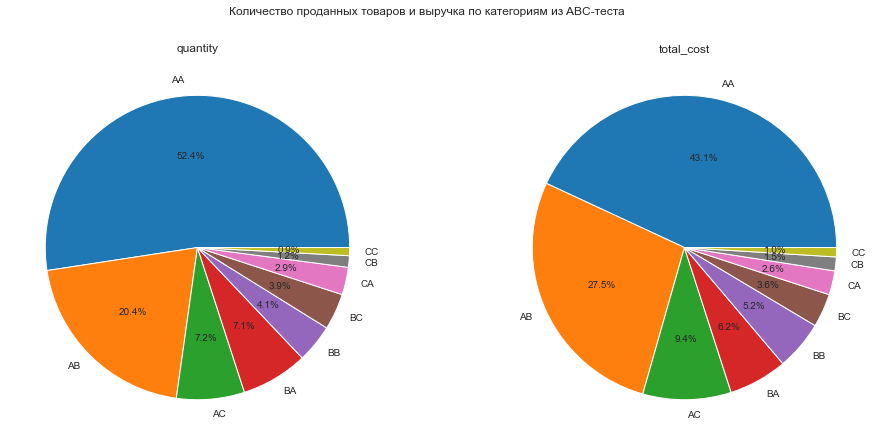

In [47]:
plt.figure(figsize=(16, 7)).suptitle('Количество проданных товаров и выручка по категориям из ABC-теста')

data = (
    df
    .groupby('inventory_category')
    .agg({'quantity': 'sum', 'total_cost': 'sum'})
)
i = 1

for column in ('quantity', 'total_cost'):
    plt.subplot(1, 2, i)
    plt.pie(
        data=data.sort_values(by=column, ascending=False),
        x=column,
        labels=data.index,
        autopct='%.1f%%'
    )
    plt.title(column)
    i += 1
plt.show()

Результаты ABC-теста подвтердились. И по продажам и по выручке основную долю занимают товары категорий **AA** и **AB**. Самую меньшую долю занимают товары категории **CC**.

Мы также сформировали две группы ассортимента, **основной** и **дополнительный**. Посмотрим, сколько уникальных товаров попало в каждую из этих группы.

In [48]:
df.groupby('inventory_group', as_index=False).agg({'product': 'nunique'}).rename(columns={'product': 'unique_products'})

,inventory_group,unique_products
0,дополнительный,1274
1,основной,1059


И рассмотрим, как разделились группы товаров внутри категорий.

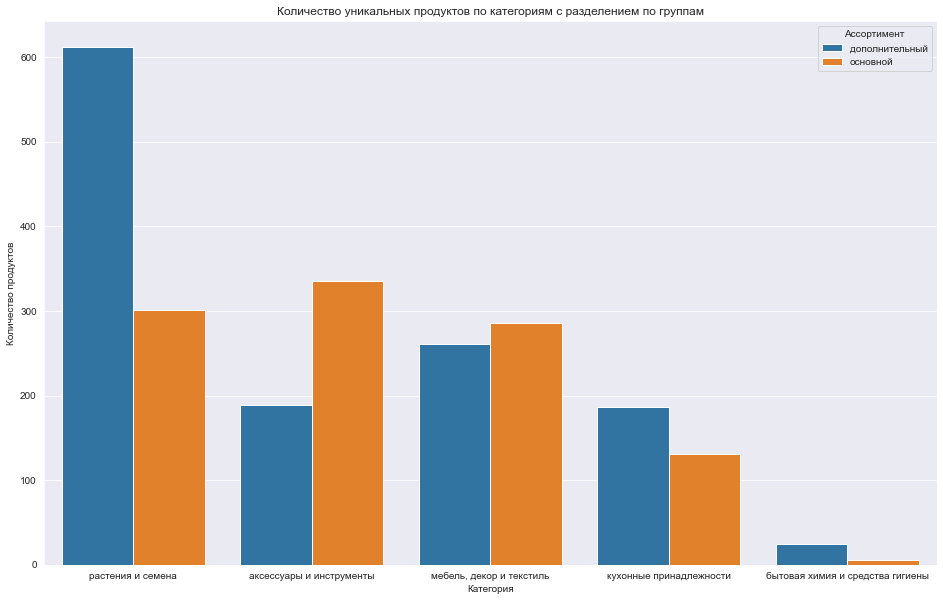

In [49]:
products_by_cat_and_group = (
    df
    .groupby(['category', 'inventory_group'], as_index=False)
    .agg({'product': 'nunique'})
    .rename(columns={'product': 'unique_products'})
    .sort_values('unique_products', ascending=False)
    .reset_index(drop=True)
)
products_by_cat_and_group
plt.figure(figsize=(16, 10))
sns.barplot(data=products_by_cat_and_group, x='category', y='unique_products', hue='inventory_group')
plt.title('Количество уникальных продуктов по категориям с разделением по группам')
plt.xlabel('Категория')
plt.ylabel('Количество продуктов')
plt.legend(title='Ассортимент')
plt.show()

В категориях `растения и семена`, `кухонные принадлежности` и `бытовая химия и средства гигиены` количество товаров **дополнительной** значительно превышает **основную** группу. В категориях `аксессуары и инструменты` и `мебель, декор и текстиль` наоборот, товаров **основной** группы больше. 

### Проверка гипотез

Сформулируем и проверим гипотезы.

**Нулевая гипотеза (H_0)**: средняя выручка заказов, совершённых во вторник, и заказов, совершённых в пятницу, равна.

**Альтернативная гипотеза (H_1)**: средняя выручка заказов, совершённых во вторник, и заказов, совершённых в пятницу, *не* равна.

Для проверки этой гипотезы мы будем использовать **t-критерий Стьюдента** и установим уровень статистической значимости alpha = **0.05**.

In [50]:
sample_a = df.query('weekday == "Вторник"')['total_cost']
sample_b = df.query('weekday == "Пятница"')['total_cost']

alpha = .05

results = st.ttest_ind(
    sample_a,
    sample_b,
    equal_var=False, # у нас нет оснований полагать, что дисперсии у генеральных совокупностей одинаковые
)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.7123585733538469
Не получилось отвергнуть нулевую гипотезу


Мы не смогли отвергнуть нулевую гипотезу о том, что средняя выручка заказов, совершённых во вторник, и заказов, совершённых в пятницу, равна. Для проверки результатов посмотрим на значение средней выручки в эти дни.  

In [51]:
df.groupby('weekday')['total_cost'].mean().loc[['Вторник', 'Пятница']]

weekday
Вторник    834.241758
Пятница    792.618656
Name: total_cost, dtype: float64

**Нулевая гипотеза (H_0)**: средняя выручка заказов из группы основного ассортимента и заказов из группы дополнительного ассортимента равна.

**Альтернативная гипотеза (H_1)**: средняя выручка заказов из группы основного ассортимента и заказов из группы дополнительного ассортимента *не* равна.

Для проверки этой гипотезы мы тоже будем использовать **t-критерий Стьюдента** с уровенем статистической значимости alpha = **0.05**.

In [52]:
sample_a = df.query('inventory_group == "основной"')['total_cost']
sample_b = df.query('inventory_group == "дополнительный"')['total_cost']

results = st.ttest_ind(
    sample_a,
    sample_b,
    equal_var=False, # у нас нет оснований полагать, что дисперсии у генеральных совокупностей одинаковые
)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.9053134466048984e-77
Отвергаем нулевую гипотезу


Удалось отвергнуть нулевую гипотезу, мы принимаем гипотезу о том, что средняя выручка заказов из группы основного ассортимента и заказов из группы дополнительного ассортимента **не** равна. Для проверки результатов посмотрим на значение средней выручки в этих ассортиментных группах.

In [53]:
df.groupby('inventory_group')['total_cost'].mean()

inventory_group
дополнительный    284.990374
основной          906.264760
Name: total_cost, dtype: float64

## Общий вывод

Мы провели исследование товарного ассортимента для того, чтобы разделить его на две группы, основной и дополнительный ассортимент. Для целей исследования мы использовали данные о транзакциях.

Нами был получен датафрейм, состоящий из 6 столбцов и 7474 строк. Мы провели предобработку данных, во время которой мы удалили дубликаты, которые составляли **26%** от общих данных. Мы рассмотрели аномальные и выбивающиеся значения. Мы также добавили в датафрейм дополнительные столбцы с временными данными, общую стоимость транзакции. Каждый из товаров мы распредели в одну из пяти категорий:
- `растения и семена`
- `кухонные принадлежности`
- `бытовая химия и средства гигиены`
- `мебель, декор и текстиль`
- `аксессуары и инструменты`

Мы провели общий анализ данных и пришли к следующим наблюдениям:
- больше всего уникальных товаров попало в категорию `растения и семена`, около **900** товаров, меньше всего в категорию `бытовая химия и средства гигиены`, **31** товар
- самая высокая медианная стоимость товаров у категории `аксессуары и инструменты`, она состалвяет составялет **787 руб**. Самая низкая - у категории `кухонные принадлежности`, она составляет **194 руб**
- по трети от общего количества проданного товара занимают категории `аксессуары и инструменты` и `бытовая химия и средства гигиены`. Меньше всего проданного товара у категории `растения и семена`
- половину от общей выручки занимают товары категории `аксессуары и инструменты`. Менее 0,5% выручки принесли товары категории `растения и семена`

Принимая во внимания эти наблюдения, мы рекомендуем пересмотреть ассортимент категорий `растения и семена` и `бытовая химия и средства гигиены`. В категории `растения и семена` больше всего уникальных товаров, однако они продаются очень мало, и приносят крайне малый процент выручки. Товары категории `бытовая химия и средства гигиены`, наоборот, очень хорошо продаются, но в их ассортименте меньше всего товаров.

Затем мы рассмотрели распределние уникальных заказов по временным отрезкам и сделали следующие наблюдения:
- в течение дня самый большой пик продаж приходится на период с **10:00** до **15:00**. Второе повышение количества заказов мы можем наблюдать вечером, в **21:00**
- больше всего заказов совершается в **понедельник** и **вторник**, затем происходит спад. Меньше всего заказов совершается в **субботу**
- больше всего заказов происходит в период с **октября** по **январь**. Самый низкий сезон - с **мая** по **сентрябрь**

Мы можем дать рекомендацию проводить распродажи и различные акции в выявленные нами периоды низких продаж для того, чтобы переместить покупателей из пиковых временных отрезков в менее популярные.

Мы выполнили ABC-тесты по количеству проданного товара, а также по выручке. По результатам тестирования мы смогли распределить все товары в две ассортиментные группы: **основная** и **дополнительная**. В **основную** группу вошли 1059 товаров, в **дополнительную** - 1274 товара. Мы также рассмотрели распределение этих групп по категориями товаров и заметили, что количество товаров **дополнительной** группы превышает **основную** группу в следующих категориях: `растения и семена`, `кухонные принадлежности` и `бытовая химия и средства гигены`. В категориях `аксессуары и инструменты` и `мебель, декор и текстиль` товаров **основной** группы больше.

Мы проверили две гипотезы и выяснили, что:
- средняя выручка заказов, совершённых во вторник, и заказов, совершённых в пятницу, **равна**
- средняя выручка заказов из группы основного ассортимента и заказов из группы дополнительного ассортимента **не равна**

## Презентация

По результатам исследования была составлена презентация <a href="https://drive.google.com/file/d/1V3Q4qxr4OXFM7BjIXtTy72wIXCV8oLVT/view?usp=sharing">по этой ссылке</a>.

## Дашборд

Дашборд доступен <a href="https://public.tableau.com/views/E-commerce-Practicum/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link">по этой ссылке</a>.